<a href="https://colab.research.google.com/github/Fraol123/DataAnalysis/blob/main/twitterAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## starting with twitter Sentiment 

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load data
from google.colab import files
uploaded = files.upload()

Saving login7 - Sheet1.csv to login7 - Sheet1.csv


In [ ]:
# get the data
log = pd.read_csv('login7 - Sheet1.csv')

In [ ]:
# get twitter API creditioals
consumerKey = log['value'][0]
consumerSecret = log['value'][1]
accessToken = log['value'][2]
accessTokenSecret = log['value'][3]


In [ ]:
log

,Key,value
0,API Key,wiy2R91GjFS08W4CBKPoExu2I
1,API Key Secret,0cNXg4r0Uuwism7WC87JMxY66omT05Tu3Ky19NqDrIONcu...
2,Access Token,775751075169271809-Z2F4Rg8RGjtLEIpK6ZMUJzlxzmO...
3,Access Token Secret,6TpVQHOlJFbZ9zcgnf6ImgXn12YOYoh1QRJx1afKadXcW


In [ ]:
# create tha autentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
# set access token
authenticate.set_access_token(accessToken, accessTokenSecret)

#create the api object passing the auth info

api = tweepy.API(authenticate, wait_on_rate_limit = True)



In [ ]:
# Extract 100 tweet from twitter user
posts = api.user_timeline(screen_name = "SamRosmarin", count=100, lang = "en", tweet_mode="extended")

# print the last 5 tweeet from sam
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i +1


Show the 5 recent tweets: 

1)RT @juliabainbridge: She draws  from botanicals to create nonalcoholic, beauty, and cannabis products, i.e. "the ideal 21st century bar car…

2)@twittwoods @hervegogo @alykhansatchu @RSkidelsky @benjaminhaddad Ukraine as an entity might not; its people do

3)@hervegogo @alykhansatchu @RSkidelsky @benjaminhaddad So to answer the question posed: “Ukraine sees itself and its citizens as more than geopolitical pawns”

4)@hervegogo @alykhansatchu @RSkidelsky @benjaminhaddad “I have never been able to understand why the west — or Ukraine itself — has refused to give Russia the assurance that there would be no forward deployment of Nato force”

As if Ukrainians have no agency of their own and instead are required to serve the hegemony of others

5)@amsaletobit @metishewyilma I love duba wot, especially if it’s kay wot. Would love to try yours.



In [ ]:
#create df with coluumn called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows of data
df.head()

,Tweets
0,RT @juliabainbridge: She draws from botanical...
1,@twittwoods @hervegogo @alykhansatchu @RSkidel...
2,@hervegogo @alykhansatchu @RSkidelsky @benjami...
3,@hervegogo @alykhansatchu @RSkidelsky @benjami...
4,"@amsaletobit @metishewyilma I love duba wot, e..."


In [ ]:
#clean the text

# create a function to clean the tweets

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @mentions
  text = re.sub(r'#', '', text) # Removing hashtag symbole
  text = re.sub(r'RT[\s]+', '', text) # remove retweets
  text = re.sub(r'https?:\/\/\S+', '', text) # remove hyper link
 
  return text

#cleaning text
df['Tweets']= df['Tweets'].apply(cleanTxt)
  # show cleaned text
df

,Tweets
0,: She draws from botanicals to create nonalco...
1,Ukraine as an entity might not; its peopl...
2,So to answer the question posed: “Ukraine ...
3,“I have never been able to understand why ...
4,"I love duba wot, especially if it’s kay wot...."
...,...
95,Hopefully people find it useful
96,Willing to bet that most gas stations offer...
97,Define “best people”. \n\nFor me that means “t...
98,Define best. For me that means “the most nat...


In [ ]:
# create a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity


  # create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# create the new column
df['subjectivity'] =df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

    #show the df with new columns
df

,Tweets,subjectivity,Polarity
0,: She draws from botanicals to create nonalco...,0.500000,0.450000
1,Ukraine as an entity might not; its peopl...,0.000000,0.000000
2,So to answer the question posed: “Ukraine ...,0.500000,0.500000
3,“I have never been able to understand why ...,0.812500,0.550000
4,"I love duba wot, especially if it’s kay wot....",0.733333,0.333333
...,...,...,...
95,Hopefully people find it useful,0.000000,0.300000
96,Willing to bet that most gas stations offer...,0.645833,0.145833
97,Define “best people”. \n\nFor me that means “t...,0.625000,0.450000
98,Define best. For me that means “the most nat...,0.625000,0.450000


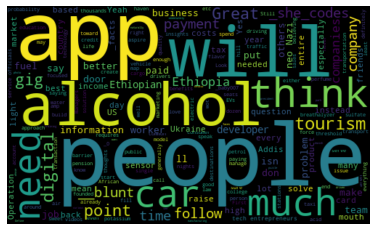

In [ ]:
from pandas.core.common import random_state
# visualize using word clod

allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = wordcloud.WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# create a function to compute the negative, neutral and postive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

# new colum Analysis

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show df
df

,Tweets,subjectivity,Polarity,Analysis
0,: She draws from botanicals to create nonalco...,0.500000,0.450000,Positive
1,Ukraine as an entity might not; its peopl...,0.000000,0.000000,Neutral
2,So to answer the question posed: “Ukraine ...,0.500000,0.500000,Positive
3,“I have never been able to understand why ...,0.812500,0.550000,Positive
4,"I love duba wot, especially if it’s kay wot....",0.733333,0.333333,Positive
...,...,...,...,...
95,Hopefully people find it useful,0.000000,0.300000,Positive
96,Willing to bet that most gas stations offer...,0.645833,0.145833,Positive
97,Define “best people”. \n\nFor me that means “t...,0.625000,0.450000,Positive
98,Define best. For me that means “the most nat...,0.625000,0.450000,Positive


In [ ]:
# print all of the postive tweets

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j= j+1

1): She draws  from botanicals to create nonalcoholic, beauty, and cannabis products, i.e. "the ideal 21st century bar car…

2)    So to answer the question posed: “Ukraine sees itself and its citizens as more than geopolitical pawns”

3)    “I have never been able to understand why the west — or Ukraine itself — has refused to give Russia the assurance that there would be no forward deployment of Nato force”

As if Ukrainians have no agency of their own and instead are required to serve the hegemony of others

4)  I love duba wot, especially if it’s kay wot. Would love to try yours.

5) Fair point on domestic workers. Yes overhaul is needed.

6) If they are considered jobs, who is making pension contributions and providing minimum employment benefits? How much income tax is paid?

7) And are these workers paying toward pension? Are they paying their proportionate taxes towards the common good?

8) That’s great supplemental income but those aren’t “jobs”

9)Put differently, more than 2

In [ ]:
# print the negtive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j= j+1

1)    It’s not a rebranding and it’s definitely confusing

2)This approach will never reach that threshold — switching costs are too high for multiple gigs every days. Also requires each gig worker to have a half dozen paid skills. 

3)For a gig to count as a job, it should fill all 270 working days per year for a single person 

4) Same creepy energy 

5) _she_codes  If someone’s car has 0.10 mg/L of alcohol in the air, they have bigger issues…I’m not sure how they haven’t suffocated already.

6)  Yeah, and in much of the US the court orders you to install them if you are found guilty of driving under the influence of alcohol.

7) Look closer at the person behind that window

8)__blunt Very interesting article. My view is that you are generally correct that tourism will strain resources like water and force displacement. These need to be carefully managed and could be beneficial or detrimental depending on the “how” — I don’t think either are automatically bad

9)Spot the minor traffi

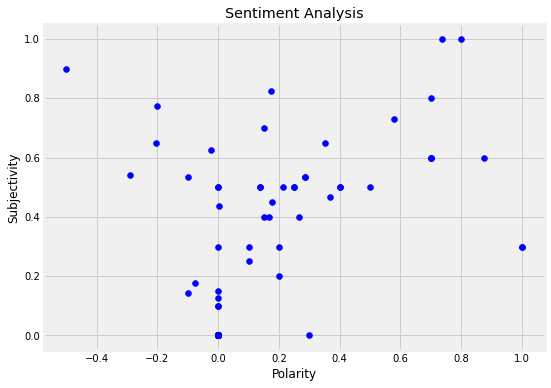

In [ ]:
# plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['subjectivity'][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of postive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round(ptweets.shape[0]/ df.shape[0] *100, 1)

57.0

In [ ]:
# Get the percentage of Negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round(ntweets.shape[0]/ df.shape[0] *100, 1)

13.0

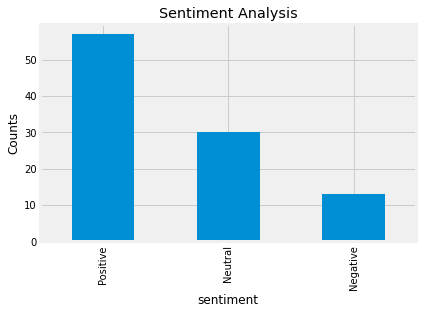

In [ ]:
# show value count

df['Analysis'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()